/home/ekrem/Ekrem/Einstein/tov_solver.py:8: RuntimeWarning: invalid value encountered in double_scalars
  rho = (p/K)**(1/Gamma)


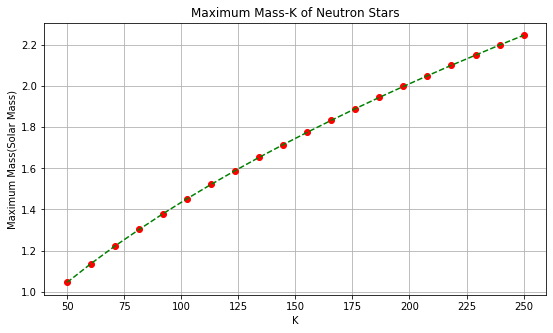

In [5]:
import numpy as np
import tov_solver as tov
import matplotlib.pyplot as plt

#### Scaling Factors ####
length = 1477 #m
time = 4.927 #s
solar_mass = 1.989e30 #kg

mass = []
max_mass =[]

tol = 1e-21

rho_c = np.linspace(1e-1,1e-4,100) ## 200 evenly spaced rho_c values as inital guess around atomic density 1e-3
K = np.linspace(50,250,20)
for k in K:
    for rho in rho_c:
        sol = tov.TOV_solver(rho,k)
        mass.append(sol.y[0,-1])
    mass = np.array(mass)    
    for i in range(len(mass)-1):
        if((mass[i+1] - mass[i]) / (rho_c[i+1] - rho_c[i])  <= tol):
            max_mass.append(mass[i])
            break
    mass = []

fig, axis = plt.subplots(figsize = (9,5))
plt.plot(K,max_mass,'ro',K,max_mass,'--g')
plt.grid(1)
plt.title("Maximum Mass-K of Neutron Stars")
plt.xlabel("K")
plt.ylabel("Maximum Mass(Solar Mass)")